In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
#cardioData = pd.read_csv('test.csv').drop('age', axis=1)
cardioData = pd.read_csv('cardio.csv').drop('age', axis=1)

cardioData.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,year,cardio_bool
0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,50,N
1,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,55,Y
2,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,52,Y
3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,48,Y
4,1,157,93.0,130,80,3,1,0,0,1,0,37.729725,61,N


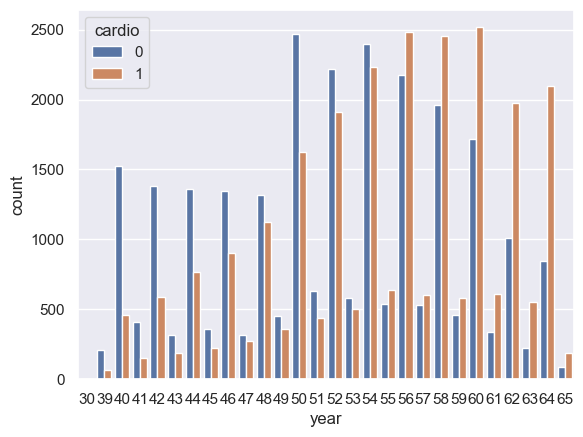

In [7]:
year = pd.DataFrame(cardioData['year'])
sb.countplot(x='year', hue='cardio', data = cardioData);

<AxesSubplot: xlabel='variable', ylabel='count'>

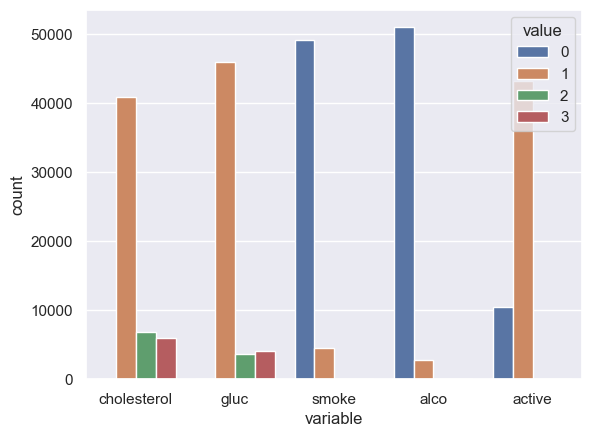

In [9]:
cardioCatData = pd.DataFrame(cardioData[['cholesterol','gluc', 'smoke', 'alco', 'active']])
sb.countplot(x="variable", hue="value", data=pd.melt(cardioCatData))

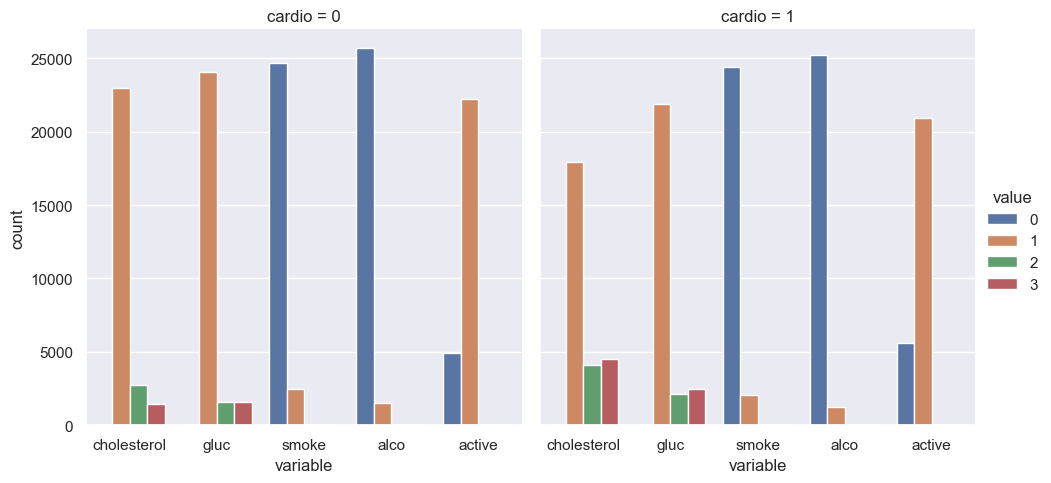

In [4]:
df_long = pd.melt(cardioData, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sb.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count");

<AxesSubplot: >

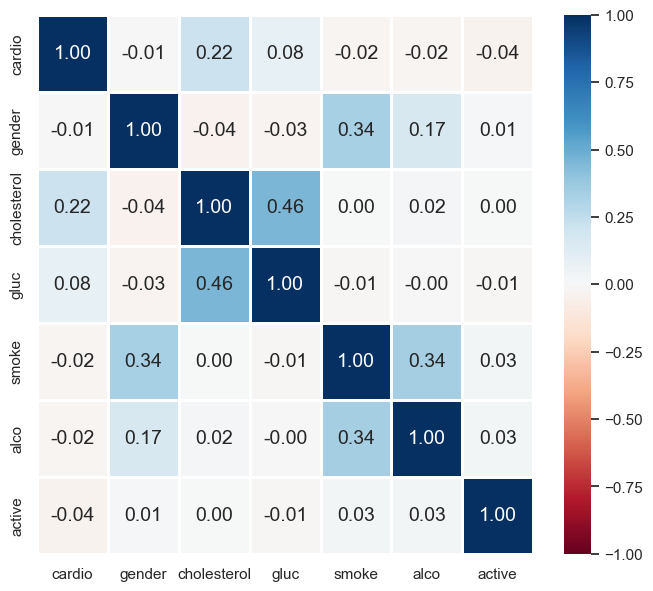

In [7]:
catData = pd.DataFrame(cardioData[['cardio','gender','cholesterol','gluc', 'smoke', 'alco', 'active']])
f, axes = plt.subplots(1, 1, figsize=(8, 7))
sb.heatmap(catData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

<AxesSubplot: xlabel='cardio', ylabel='active'>

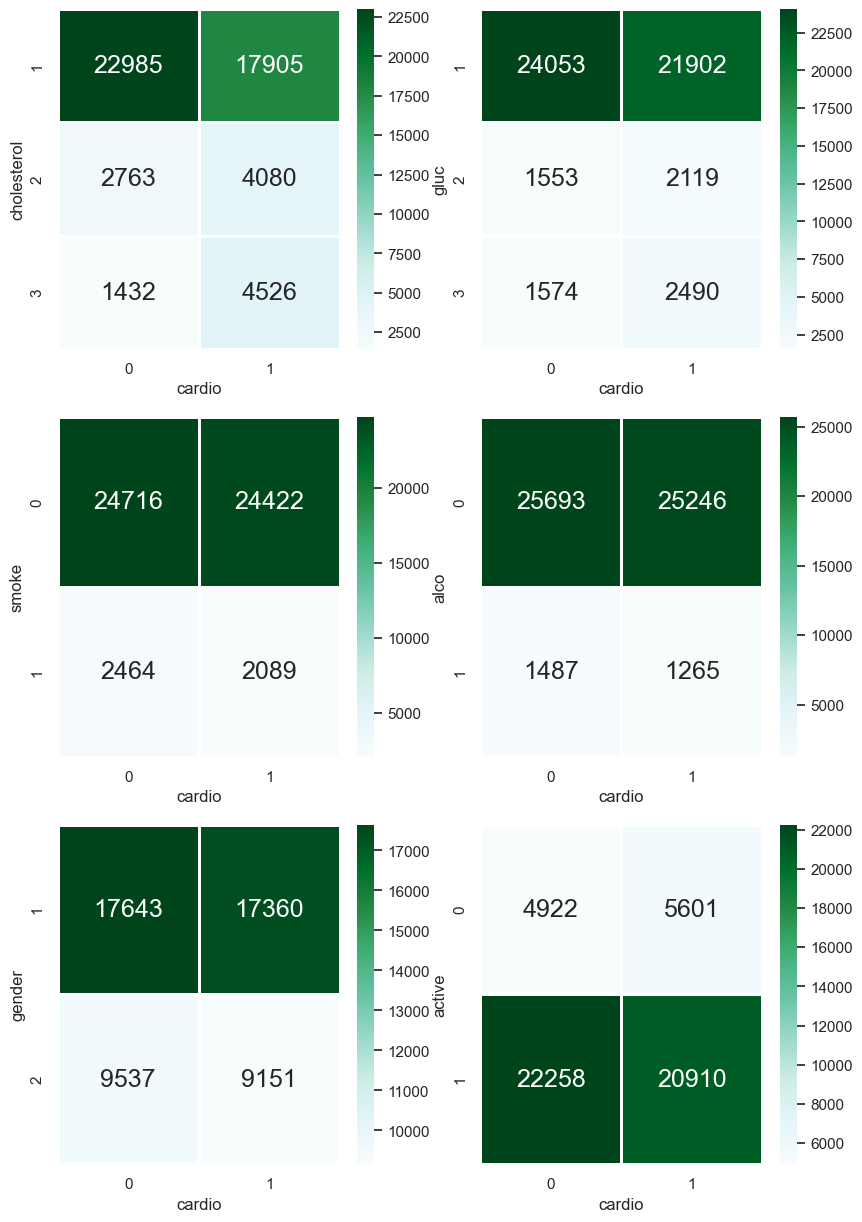

In [9]:
catData = pd.DataFrame(cardioData[['cardio','gender','cholesterol','gluc', 'smoke', 'alco', 'active']])

f, axes = plt.subplots(3, 2, figsize=(10, 15))
sb.heatmap(catData.groupby(['cholesterol', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[0,0])
sb.heatmap(catData.groupby(['gluc', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[0,1])
sb.heatmap(catData.groupby(['smoke', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[1,0])
sb.heatmap(catData.groupby(['alco', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[1,1])
sb.heatmap(catData.groupby(['gender', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[2,0])
sb.heatmap(catData.groupby(['active', 'cardio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[2,1])